In [1]:
import tensorflow as tf

In [2]:
tf.reduce_sum(tf.random.normal([1000,1000]))

<tf.Tensor: shape=(), dtype=float32, numpy=720.0249>

In [4]:
from tensorflow import keras
from tensorflow.keras.datasets import mnist

In [5]:
mnist.load_data()

11493376/11490434 [==============================] - 3s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [6]:
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [7]:
train_images.ndim

3

In [8]:
train_images.dtype

dtype('uint8')

In [9]:
train_images.shape

(60000, 28, 28)

In [18]:
digit=train_images[5]

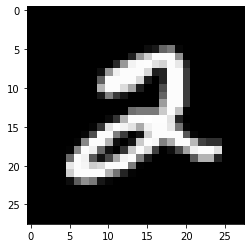

In [19]:
import matplotlib.pyplot as plt
plt.imshow(digit, cmap = 'gray')
plt.show()

In [15]:
digit

NameError: name 'digit' is not defined

In [26]:
my_slice = train_images[:, :-7, :-7]

# my_slice = train_images[11:101, 0:28, 0:28] 같다
#my_slice = train_images[11:101]
print(my_slice.shape)

(60000, 21, 21)


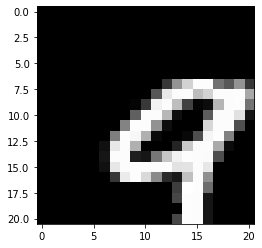

In [32]:
plt.imshow(my_slice[4], cmap = 'gray')
plt.show()

## 배치 데이터

In [33]:
batch = train_images[:128]

In [34]:
batch2 = train_images[128:256]

In [36]:
# n 번째 배치
n = 3
batch3 = train_images[128*n:128*(n+1)]

# 2차원 : 벡터 데이터
(samples, features)

# 3차원 : 시계열 데이터, sequence data
(samples, timesteps, features)
(10000000, 280, 128)

# 4차원 : 영상 - channels 들어감
(samples, height, width, channels), (samples, channels, height, width)
channel last (128, 256, 256, 3) --> tensorflow
channel first (128, 3, 256, 256) --> pytorch, Theano
channel first or last 선택 가능 --> 


# 5차원 : 동영상- frames 들어감
(samples, frames, height, width, channels)
(4, 240, 144, 256, 3)

In [37]:
1000000 * 280 *128

35840000000

In [40]:
4 * 240 * 144 * 256 *3
# 저기서 * 32해야 비트 

106168320

In [41]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers
import numpy as np

In [42]:
공부시간 = np.array([1,2,3,4,5,6])
점수 = np.array([10,21,30,40,51,60])

In [43]:
# 모델 구성

model = Sequential()
# Dense : 입력값과 출력값 연결 된 것
# input값 하나, 출력값 하나
model.add(Dense(1, input_dim  = 1, activation = 'linear'))

In [47]:
#컴파일
# 알파값 0.01
sgd = optimizers.SGD(learning_rate = 0.01)
model.compile(optimizer=sgd, loss = 'mse',metrics =['accuracy'])

In [49]:
# 100번 학습
model.fit(공부시간, 점수,epochs = 100, batch_size = 1, shuffle = False)

Epoch 1/100
6/6 [==============================] - 0s 1ms/step - loss: 162.7939 - accuracy: 0.0000e+00
Epoch 2/100
6/6 [==============================] - 0s 1ms/step - loss: 1.2143 - accuracy: 0.0000e+00
Epoch 3/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9375 - accuracy: 0.0000e+00
Epoch 4/100
6/6 [==============================] - 0s 1ms/step - loss: 0.9261 - accuracy: 0.0000e+00
Epoch 5/100
6/6 [==============================] - 0s 2ms/step - loss: 0.9007 - accuracy: 0.0000e+00
Epoch 6/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8755 - accuracy: 0.0000e+00
Epoch 7/100
6/6 [==============================] - 0s 1ms/step - loss: 0.8515 - accuracy: 0.0000e+00
Epoch 8/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8285 - accuracy: 0.0000e+00
Epoch 9/100
6/6 [==============================] - 0s 2ms/step - loss: 0.8065 - accuracy: 0.0000e+00
Epoch 10/100
6/6 [==============================] - 0s 2ms/step - loss: 0.7855 - accuracy

6/6 [==============================] - 0s 2ms/step - loss: 0.3515 - accuracy: 0.0000e+00
Epoch 82/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3506 - accuracy: 0.0000e+00
Epoch 83/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3498 - accuracy: 0.0000e+00
Epoch 84/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3490 - accuracy: 0.0000e+00
Epoch 85/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3483 - accuracy: 0.0000e+00
Epoch 86/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3476 - accuracy: 0.0000e+00
Epoch 87/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3469 - accuracy: 0.0000e+00
Epoch 88/100
6/6 [==============================] - 0s 1ms/step - loss: 0.3462 - accuracy: 0.0000e+00
Epoch 89/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3456 - accuracy: 0.0000e+00
Epoch 90/100
6/6 [==============================] - 0s 2ms/step - loss: 0.3450 - accuracy: 0.00

In [51]:
print('예측한 결과 :', model.predict([7]))
print('파라미터 수 : ', model.count_params())

예측한 결과 : [[70.05451]]
파라미터 수 :  2


In [ ]:
# 피처가 n = 6개
x1= np.array([1,2,3,4,5,6])
x2
x3
x4
x5
x6
y = np.array([10,21,30,40,51,60])

# 입력층과 출력층 하나 밖에 없음
model.add(Dense(1, input_dim  = 6, activation = 'linear'))

#count_params() 는 7개



In [114]:
from tensorflow.keras.datasets import boston_housing

In [115]:
import pandas as pd
import matplotlib.pyplot as plt

In [116]:
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [117]:
train_data.shape

(404, 13)

In [118]:
test_data.shape

(102, 13)

In [119]:
mean = train_data.mean(axis = 0)
train_data -= mean
std = train_data.std(axis = 0)
train_data /= std

test_data -= mean
test_data /= std

In [120]:
train_data.shape[1]

13

In [121]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation = 'relu', input_shape = (train_data.shape[1],)))
    model.add(layers.Dense(1))
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [122]:
train_targets

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4, 12.1,
       17.9, 23.1, 19.9, 15.7,  8.8, 50. , 22.5, 24.1, 27.5, 10.9, 30.8,
       32.9, 24. , 18.5, 13.3, 22.9, 34.7, 16.6, 17.5, 22.3, 16.1, 14.9,
       23.1, 34.9, 25. , 13.9, 13.1, 20.4, 20. , 15.2, 24.7, 22.2, 16.7,
       12.7, 15.6, 18.4, 21. , 30.1, 15.1, 18.7,  9.6, 31.5, 24.8, 19.1,
       22. , 14.5, 11. , 32. , 29.4, 20.3, 24.4, 14.6, 19.5, 14.1, 14.3,
       15.6, 10.5,  6.3, 19.3, 19.3, 13.4, 36.4, 17.8, 13.5, 16.5,  8.3,
       14.3, 16. , 13.4, 28.6, 43.5, 20.2, 22. , 23. , 20.7, 12.5, 48.5,
       14.6, 13.4, 23.7, 50. , 21.7, 39.8, 38.7, 22.2, 34.9, 22.5, 31.1,
       28.7, 46. , 41.7, 21. , 26.6, 15. , 24.4, 13.3, 21.2, 11.7, 21.7,
       19.4, 50. , 22.8, 19.7, 24.7, 36.2, 14.2, 18.9, 18.3, 20.6, 24.6,
       18.2,  8.7, 44. , 10.4, 13.2, 21.2, 37. , 30.7, 22.9, 20. , 19.3,
       31.7, 32. , 23.1, 18.8, 10.9, 50. , 19.6,  5. , 14.4, 19.8, 13.8,
       19.6, 23.9, 24.5, 25. , 19.9, 17.2, 24.6, 13

In [123]:
train_data

array([[-0.27224633, -0.48361547, -0.43576161, ...,  1.14850044,
         0.44807713,  0.8252202 ],
       [-0.40342651,  2.99178419, -1.33391162, ..., -1.71818909,
         0.43190599, -1.32920239],
       [ 0.1249402 , -0.48361547,  1.0283258 , ...,  0.78447637,
         0.22061726, -1.30850006],
       ...,
       [-0.40202987,  0.99079651, -0.7415148 , ..., -0.71712291,
         0.07943894, -0.67776904],
       [-0.17292018, -0.48361547,  1.24588095, ..., -1.71818909,
        -0.98764362,  0.42083466],
       [-0.40422614,  2.04394792, -1.20161456, ..., -1.30866202,
         0.23317118, -1.15392266]])

In [124]:
model = models.Sequential()
model.add(layers.Dense(1,input_dim = 13, activation = 'linear'))
sgd = optimizers.SGD(learning_rate=0.01)
model.compile(optimizer = 'rmsprop', loss = 'mse',metrics =['accuracy'])
    

In [125]:
model.count_params()

14

In [126]:
from tensorflow.keras import backend as k
k.clear_session()
model.fit(train_data, train_targets, epochs = 100, batch_size = 1, shuffle=False)

Epoch 1/100
404/404 [==============================] - 1s 701us/step - loss: 569.8911 - accuracy: 0.0000e+00
Epoch 2/100
404/404 [==============================] - 0s 762us/step - loss: 549.0827 - accuracy: 0.0000e+00
Epoch 3/100
404/404 [==============================] - 0s 634us/step - loss: 529.4601 - accuracy: 0.0000e+00
Epoch 4/100
404/404 [==============================] - 0s 647us/step - loss: 510.8047 - accuracy: 0.0000e+00
Epoch 5/100
404/404 [==============================] - 0s 672us/step - loss: 492.9947 - accuracy: 0.0000e+00
Epoch 6/100
404/404 [==============================] - 0s 595us/step - loss: 475.9305 - accuracy: 0.0000e+00
Epoch 7/100
404/404 [==============================] - 0s 626us/step - loss: 459.5297 - accuracy: 0.0000e+00
Epoch 8/100
404/404 [==============================] - 0s 603us/step - loss: 443.7240 - accuracy: 0.0000e+00
Epoch 9/100
404/404 [==============================] - 0s 669us/step - loss: 428.4580 - accuracy: 0.0000e+00
Epoch 10/100
404/40

404/404 [==============================] - 0s 634us/step - loss: 44.4483 - accuracy: 0.0000e+00
Epoch 76/100
404/404 [==============================] - 0s 601us/step - loss: 43.8234 - accuracy: 0.0000e+00
Epoch 77/100
404/404 [==============================] - 0s 611us/step - loss: 43.2299 - accuracy: 0.0000e+00
Epoch 78/100
404/404 [==============================] - 0s 591us/step - loss: 42.6656 - accuracy: 0.0000e+00
Epoch 79/100
404/404 [==============================] - 0s 596us/step - loss: 42.1286 - accuracy: 0.0000e+00
Epoch 80/100
404/404 [==============================] - 0s 601us/step - loss: 41.6173 - accuracy: 0.0000e+00
Epoch 81/100
404/404 [==============================] - 0s 614us/step - loss: 41.1299 - accuracy: 0.0000e+00
Epoch 82/100
404/404 [==============================] - 0s 599us/step - loss: 40.6652 - accuracy: 0.0000e+00
Epoch 83/100
404/404 [==============================] - 0s 632us/step - loss: 40.2218 - accuracy: 0.0000e+00
Epoch 84/100
404/404 [==========

In [129]:
y_pred = model.predict(test_data)

In [131]:
# Importing mean square error and r square from sklearn library.
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(test_targets, y_pred)
r_squared = r2_score(test_targets, y_pred)

# Printing mean square error and R square value
print('Mean_Squared_Error :' ,mse)
print('r_square_value :',r_squared)

Mean_Squared_Error : 19.865617071973723
r_square_value : 0.761356335330309
